In [20]:
import pandas as pd
df = pd.read_csv('C:/Users/guist/Desktop/Google_Stock_Price.csv')
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [33]:
df['date'] = pd.to_datetime(df['date'])

df.info()

df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   symbol     1761 non-null   object        
 1   date       1761 non-null   datetime64[ns]
 2   open       1761 non-null   float64       
 3   high       1761 non-null   float64       
 4   low        1761 non-null   float64       
 5   close      1761 non-null   float64       
 6   volume     1761 non-null   int64         
 7   adjclose   1761 non-null   float64       
 8   dividends  1761 non-null   float64       
 9   splits     1761 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 137.7+ KB


symbol       0
date         0
open         0
high         0
low          0
close        0
volume       0
adjclose     0
dividends    0
splits       0
dtype: int64

In [22]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    condition = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    outliers[col] = df[condition][col].count()

outliers

{'open': 0,
 'high': 0,
 'low': 0,
 'close': 0,
 'volume': 91,
 'adjclose': 0,
 'dividends': 3,
 'splits': 1}

In [34]:
df.describe()

,date,open,high,low,close,volume,adjclose,dividends,splits
count,1761,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1761.000000,1761.000000
mean,2021-07-01 15:36:17.172061440,102.021411,103.171589,100.982265,102.092157,2.859376e+07,101.754831,0.000341,0.011357
min,2018-01-02 00:00:00,48.695000,50.176998,48.505501,48.811001,6.809800e+06,48.636250,0.000000,0.000000
25%,2019-10-02 00:00:00,61.463001,62.043999,60.938499,61.496498,1.992200e+07,61.276325,0.000000,0.000000
50%,2021-07-01 00:00:00,100.059998,101.658997,99.169998,100.739998,2.561200e+07,100.379326,0.000000,0.000000
75%,2023-03-31 00:00:00,135.570007,137.070999,134.183502,135.990005,3.304600e+07,135.503128,0.000000,0.000000
max,2024-12-31 00:00:00,198.529999,202.880005,196.690002,198.160004,1.241400e+08,198.160004,0.200000,20.000000
std,NaN,39.637483,40.020994,39.274690,39.637305,1.317064e+07,39.547744,0.008250,0.476596


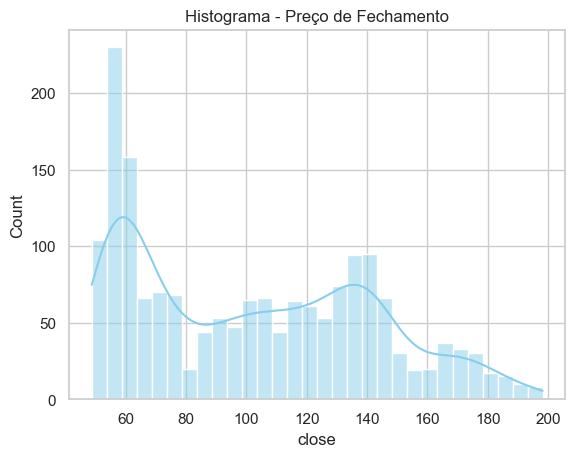

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

sns.histplot(df['close'], bins=30, kde=True, color='skyblue')
plt.title("Histograma - Preço de Fechamento")
plt.show()



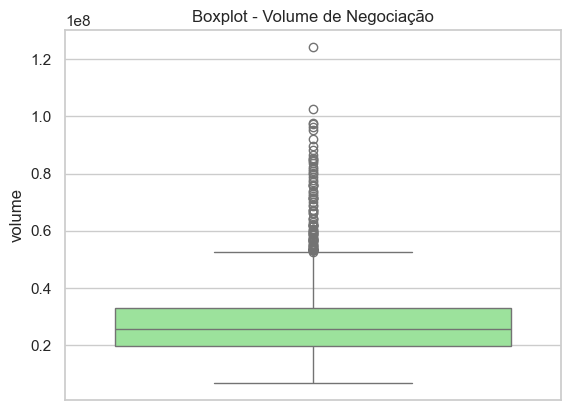

In [36]:
sns.boxplot(y=df['volume'], color='lightgreen')
plt.title("Boxplot - Volume de Negociação")
plt.show()



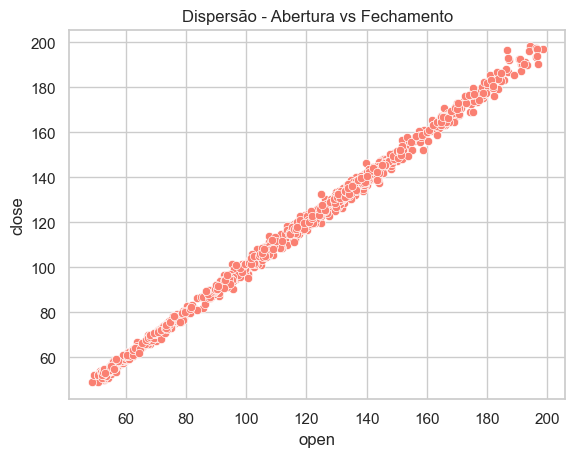

In [37]:
sns.scatterplot(x='open', y='close', data=df, color='salmon')
plt.title("Dispersão - Abertura vs Fechamento")
plt.show()

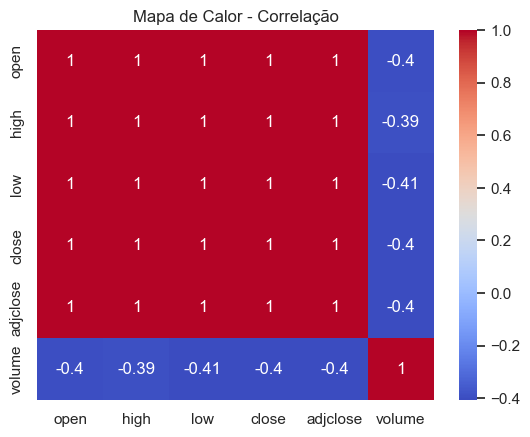

In [27]:
correlacao = df[['open', 'high', 'low', 'close', 'adjclose', 'volume']].corr()
sns.heatmap(correlacao, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor - Correlação")
plt.show()

In [38]:
from scipy.stats import kstest, norm

dados = df['close'].dropna()
normalized = (dados - dados.mean()) / dados.std()

kstest(normalized, 'norm')

KstestResult(statistic=0.12730429586869446, pvalue=2.443664311805263e-25, statistic_location=-0.6557246757791146, statistic_sign=1)